# Final Assignment - Part 1

### Assignment Instructions

#### Part 1   |   Standard Difficulty Level

In this first part, you will be working with a datasets containing information of over 20k Software Professionals with different variables like:

- the `Rating` of the company given by the employee,
- the `Company Name`,
- the `Job Title` of the employee,
- the employee `Salary` (in Indian Rupee ₹),
- the number of `Salaries Reported`,
- the `Location` of the company,
- the `Employment Status` and
- the category of the `Job Roles`

The dataset name is `Software Professionals Salary.csv` and you will find it in the `data` folder of this repository. At [this link](https://www.kaggle.com/datasets/iamsouravbanerjee/software-professional-salaries-2022?search=salary) you can find the source of the data (Kaggle) as well as more information on its composition.

**Setup:** Import the necessary libraries and load the .csv file to a DataFrame named `sps`. Check that all columns have the correct data type.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
sps = pd.read_excel('C:\\Users\\axmcr\\Downloads\\00_Boolean\\Software Professionals Salary.xlsx')

1. What is the shape (rows, cols) of the `sps` DataFrame?

In [ ]:
# 1.
sps.shape

(22770, 8)

2. How many unique `Job Roles` are there in the dataset?

In [ ]:
# 2.
len(sps['Job Roles'].unique())

11

3. How many unique `Job Title` are there for the "Python" `Job Role`?

In [ ]:
# 3.
len(sps['Job Title'][sps['Job Roles'] == 'Python'].unique())

102

4. Of the `Company Name`s that are listed in the DataFrame, **how many** have a "Python" `Job Role` with a `Job Title` containing the **substring** "Analyst"?

In [11]:
# 4.
len(sps['Company Name'][(sps['Job Roles'] == 'Python') & # Filter on the 'Job Role' = Python
                        (sps['Job Title'].str.contains('Analyst', case=False, regex=False))]) # Filter on the 'Job Title' matching the substring 'Analyst'

3

5. Which `Company Name` has the highest number of `Salaries Reported` (across all `Job Title`s)?

In [20]:
# 5.
sps.groupby('Company Name', as_index=False)['Salaries Reported'].sum().nlargest(1, 'Salaries Reported')

,Company Name,Salaries Reported
660,Amazon,2636


6. Given the `Company Name` you found at the previous question, how many `Location`s is this company present in?

In [ ]:
# 6.
len(sps.Location[sps['Company Name'] == 'Amazon'].unique())

9

7. As you may have noticed, the `Salary` is reported in Indian Rupees (ISO code: INR). Using the [Open Access Endpoint](https://www.exchangerate-api.com/docs/free) (no API Key required) of the ExchangeRate-API service, create a new column named `Salary USD` containing the salary-equivalent in USD and round the result to zero decimals. What is the conversion rate between USD-INR at the time of your execution? *Note: of course, this result will change in time*

In [ ]:
# 7.
url = "https://open.er-api.com/v6/latest/USD" # Save url into a variable
r = requests.get(url) # Make a get request
sps['Salary USD'] = round((sps.Salary # Take the original column
                           / r.json()['rates']['INR']), # devide by the daily converion rate
                             0).astype('int32') # round to 0 and convert to int32 dtype
print("The conversion rate between USD-INR on 26/10/2025 was", r.json()['rates']['INR']) # Print the answer

The conversion rate between USD-INR on 26/10/2025 was 87.848438


8. What is the average `Salary USD` for the "Python" `Job Role`?

In [ ]:
# 8.
sps[sps['Job Roles'] == 'Python']['Salary USD'].mean()

np.float64(5532.517423442449)

9. Which `Company Name` has the highest **average** `Salary USD` across all `Job Title`s?

In [ ]:
# 9.
sps.groupby('Company Name', as_index=False)['Salary USD'].mean().nlargest(1,'Salary USD')

,Company Name,Salary USD
9413,Thapar University,1024492.0


10. Create a Plot that shows the **relationship** between the average `Salary USD` and the average `Rating` for each `Company Name`. Do you see any anomaly in the plot? Which is the `Company Name` that is causing this oddity?

Text(0.5, 1.0, 'Relationship between the average Salary USD and the average Rating')

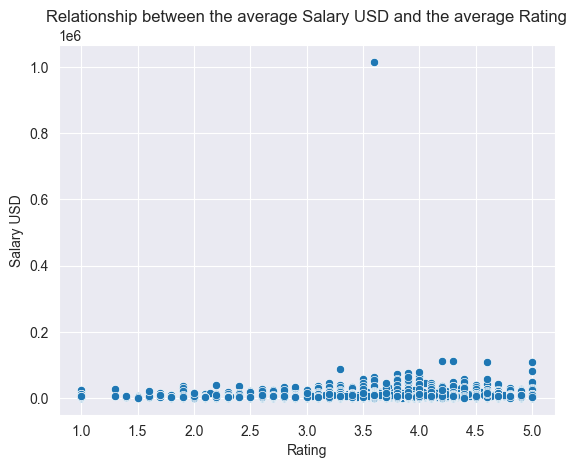

In [23]:
# 10.
sps_s = sps.groupby('Company Name', as_index=False)['Salary USD'].mean() # Calculate the avg 'Salary USD' and store it into a variable
sps_r = sps.groupby('Company Name', as_index=False)['Rating'].mean() # Calculate the avg 'Rating' and store it into a variable
sps_sr = sps_r.merge(sps_s, how='inner', on='Company Name') # Perform inner join of the two df on the 'Company Name' column
sns.set_style('darkgrid')
sns.scatterplot(x='Rating', 
                y='Salary USD', 
                data=sps_sr).set_title('Relationship between the average Salary USD and the average Rating')

In [29]:
# 10.
sps_sr['Company Name'][sps_sr['Salary USD'] > 1e6] # filter the df for salary > 1.0E6 to select the outlier 'Company Name'

9413    Thapar University
Name: Company Name, dtype: object